# Project_17 - Pytorch Classification (Circles)

## Project Description
1. Create circles dataset using make_circles package in sklearn
2. Train a torch.nn model to classify the circles
3. Visualize the classification result

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim

In [2]:
device='cuda' if torch.cuda.is_available else 'cpu'

In [3]:
# create dataset using make_circles
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
X.shape, y.ndim

((1000, 2), 1)

In [5]:
print(X[:5])
print(y.sum())

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
500


In [6]:
circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 1],
                        'label': y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


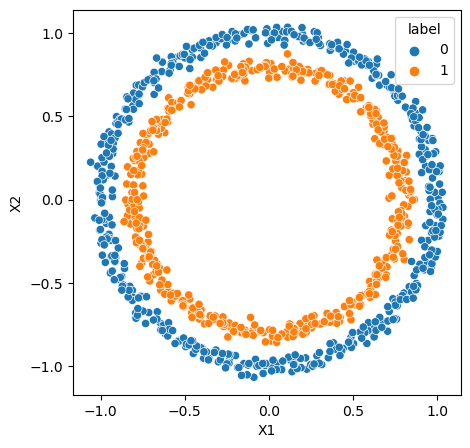

In [7]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(data=circles, x='X1', y='X2', hue='label')
plt.show()

In [8]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [9]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
type(X)

torch.Tensor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [11]:
y_train.shape, y_test.shape

(torch.Size([800]), torch.Size([200]))

In [12]:
# class BinaryClassificationModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.layer_1 = nn.Linear(in_features=2, out_features=4)
#     self.layer_2 = nn.Linear(in_features=4, out_features=1)

#   def forward(self, x):
#     x = torch.relu(self.layer_1(x))
#     x = torch.sigmoid(self.layer_2(x))
#     return x

In [13]:
model = nn.Sequential(
    nn.Linear(2, 5),
    nn.ReLU(),
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

In [14]:
#model = BinaryClassificationModel()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [15]:
epochs = 200
epoch_count = []
train_losses = []
test_losses = []

In [16]:
for epoch in range(epochs):
  model.train()
  y_pred = model(X_train).squeeze()
  train_loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_pred = model(X_test).squeeze()
    test_loss = loss_fn(test_pred, y_test)
    epoch_count.append(epoch)
    train_losses.append(train_loss.detach().numpy())
    test_losses.append(test_loss)
    if epoch % 20 == 0:
      print(f'epoch: {epoch} | train_loss: {train_loss}  | test_loss:{test_loss}')

epoch: 0 | train_loss: 0.6984519362449646  | test_loss:0.6962794661521912
epoch: 20 | train_loss: 0.6870037317276001  | test_loss:0.6844804883003235
epoch: 40 | train_loss: 0.6699205040931702  | test_loss:0.6743408441543579
epoch: 60 | train_loss: 0.5974425077438354  | test_loss:0.6110590696334839
epoch: 80 | train_loss: 0.4067457616329193  | test_loss:0.421015202999115
epoch: 100 | train_loss: 0.27686429023742676  | test_loss:0.28558072447776794
epoch: 120 | train_loss: 0.19618315994739532  | test_loss:0.2140936404466629
epoch: 140 | train_loss: 0.06839564442634583  | test_loss:0.13610072433948517
epoch: 160 | train_loss: 0.03527117148041725  | test_loss:0.08905208855867386
epoch: 180 | train_loss: 0.023112311959266663  | test_loss:0.06912092864513397


In [17]:
type(train_losses)

list

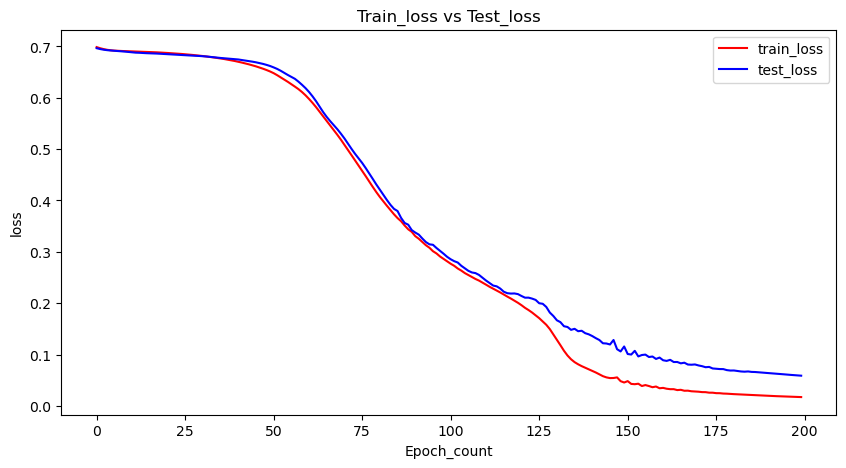

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_count, train_losses, c='r')
plt.plot(epoch_count, test_losses, c='b')
plt.title('Train_loss vs Test_loss')
plt.xlabel('Epoch_count')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])
plt.show()

In [19]:
def accuracy(y_pred, y_test):
  correct = torch.eq(torch.round(torch.sigmoid(y_pred)).squeeze(), y_test).sum().item()
  accuracy = (correct/len(y_pred)) * 100
  return accuracy

In [20]:
result = accuracy(test_pred, y_test)
print(result)

98.0


In [21]:
# import requests
# from pathlib import Path

# if Path('helper_function.py').is_file():
#   print('helper_function.py already exists.')
# else:
#   print('Downloading helper_function.py')
#   request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
#   with open('helper_function.py', 'wb') as f:
#     f.write(request.content)

In [23]:
# from helper_function import plot_predictions, plot_decision_boundary

In [24]:
# plt.figure(figsize=(5, 5))
# plot_decision_boundary(model, X_test, y_test)
# plt.show()